In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.shape

(1460, 81)

In [3]:
train.describe()
# test.columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
train.drop(['Alley'], axis=1, inplace=True)
test.drop(['Alley'], axis=1, inplace=True)
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [6]:
numeric_data = train.select_dtypes(include=['int64', 'float64'])

correlation = numeric_data.corr()['SalePrice']

relevant_features = correlation[abs(correlation) >= 0.4].drop('SalePrice').index.tolist()

print(relevant_features)
feat=relevant_features+['MSZoning','LotConfig','Neighborhood','BldgType','HouseStyle','OverallCond','MasVnrType']
train_x=train[feat]#,'Condition1','Condition2',,'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','PavedDrive']
test_x=test[feat]

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [7]:
# train_x.hist(figsize=(20,20),bins=50)
print(train_x.columns)
print(test_x.columns)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MSZoning', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallCond', 'MasVnrType'],
      dtype='object')
Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MSZoning', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallCond', 'MasVnrType'],
      dtype='object')


In [8]:

cat_features = ['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallCond', 'MasVnrType']

# Make a copy of train_x to preserve the original
train_x_encoded = train_x.copy()
test_x_encoded = test_x.copy()

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in cat_features:
    train_x_encoded[col] = le.fit_transform(train_x[col].astype(str))
    test_x_encoded[col] = le.fit_transform(test_x[col].astype(str))
train_x_encoded

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MSZoning,LotConfig,Neighborhood,BldgType,HouseStyle,OverallCond,MasVnrType
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,3,4,5,0,5,4,1
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,3,2,24,0,2,7,3
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,3,4,5,0,5,4,1
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,3,0,6,0,5,4,3
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,3,2,15,0,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,1999.0,2,460,3,4,8,0,5,4,3
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,1978.0,2,500,3,4,14,0,2,5,2
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1941.0,1,252,3,4,6,0,5,8,3
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1950.0,1,240,3,4,12,0,2,5,3


In [9]:
train_x_encoded.isnull().sum()
train_x_encoded['MasVnrArea'].fillna(train_x_encoded['MasVnrArea'].mean(), inplace=True)
train_x_encoded['GarageYrBlt'].fillna(train_x_encoded['GarageYrBlt'].mean(), inplace=True)
train_x_encoded['MasVnrType'].fillna(0, inplace=True)
test_x_encoded.isnull().sum()
test_x_encoded['MasVnrArea'].fillna(test_x_encoded['MasVnrArea'].mean(), inplace=True)
test_x_encoded['GarageYrBlt'].fillna(test_x_encoded['GarageYrBlt'].mean(), inplace=True)
test_x_encoded['MasVnrType'].fillna(0, inplace=True)
test_x_encoded['TotalBsmtSF'].fillna(0, inplace=True)
test_x_encoded['GarageCars'].fillna(0, inplace=True)
test_x_encoded['GarageArea'].fillna(0, inplace=True)

C:\Users\zyzai\AppData\Local\Temp\ipykernel_3512\2273377319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_x_encoded['MasVnrArea'].fillna(train_x_encoded['MasVnrArea'].mean(), inplace=True)
C:\Users\zyzai\AppData\Local\Temp\ipykernel_3512\2273377319.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

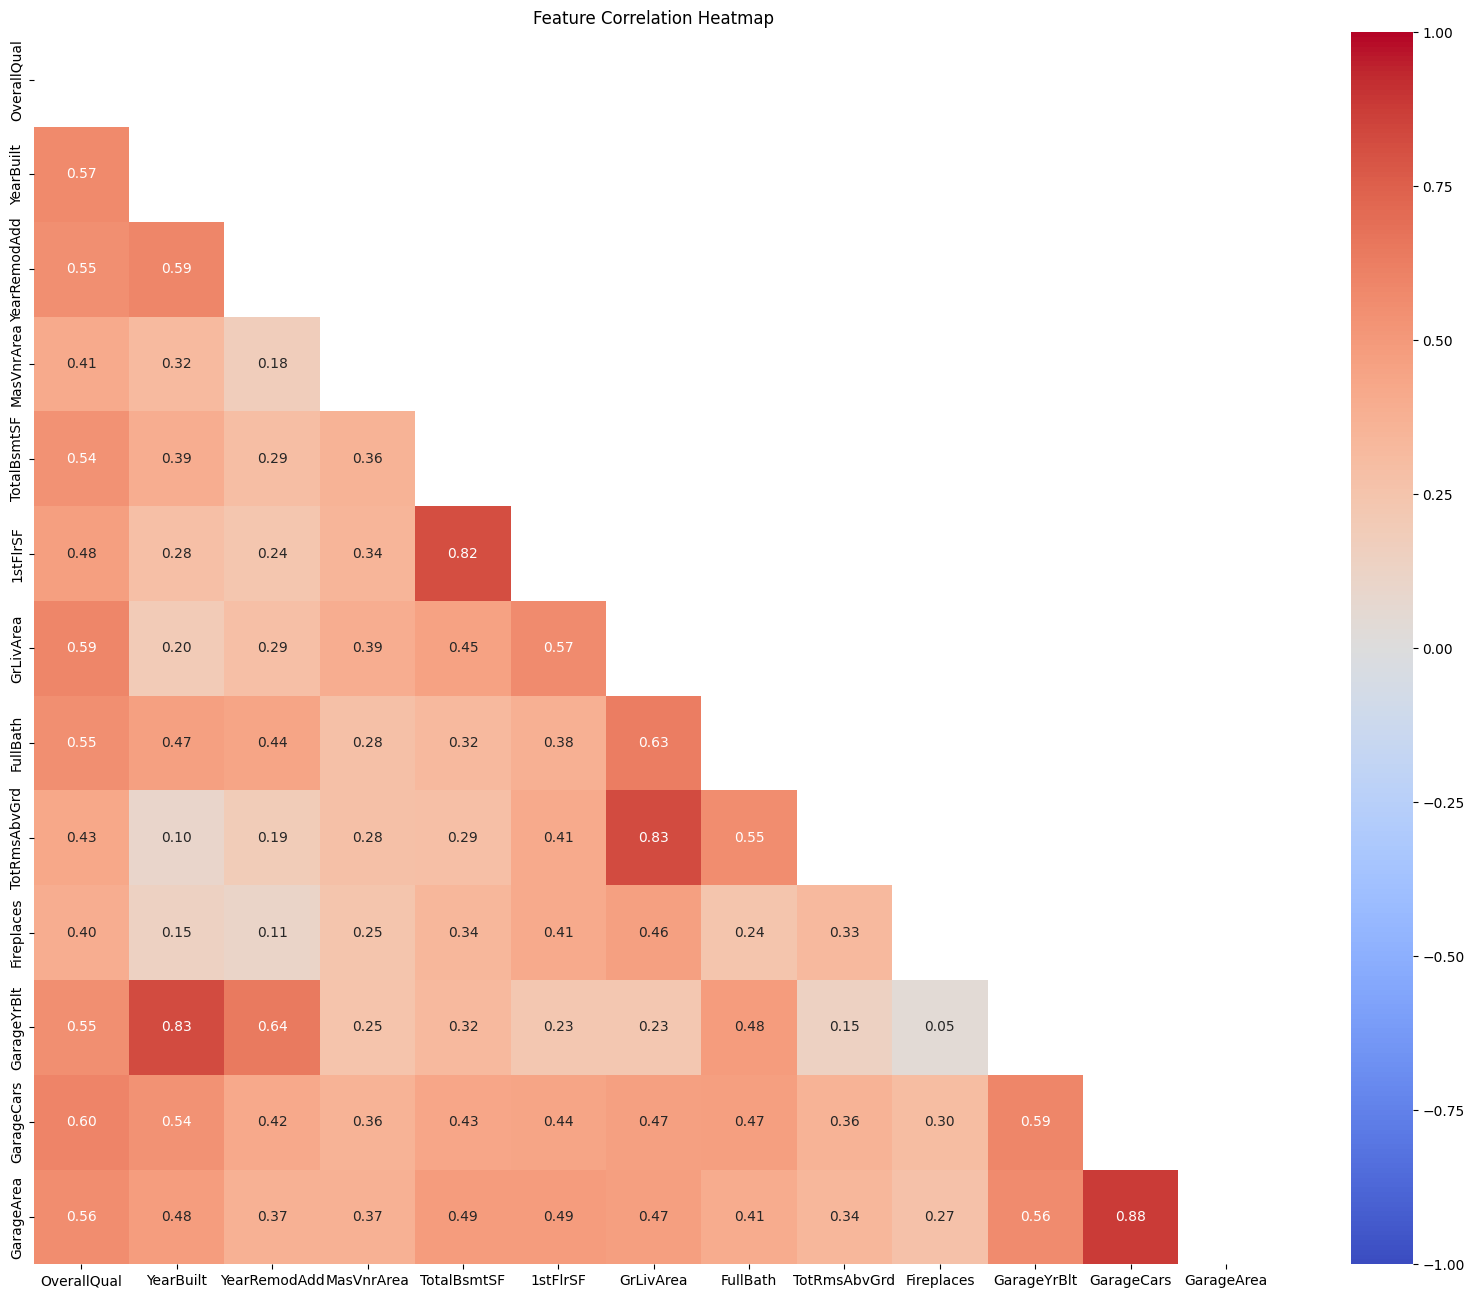

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = train_x_encoded.select_dtypes(include=['float64', 'int64']).columns
corr_df = train[relevant_features].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(corr_df))  # Hide upper triangle for clarity
)
plt.title("Feature Correlation Heatmap")
plt.show()



In [11]:
train_x_encoded['Age']= 2023 - train_x_encoded['YearBuilt']
train_x_encoded.drop(['YearBuilt'], axis=1, inplace=True)
train_x_encoded["last_modernization"] = 2023 - train_x_encoded["YearRemodAdd"]
train_x_encoded.drop(['YearRemodAdd'], axis=1, inplace=True)
test_x_encoded['Age']= 2023 - test_x_encoded['YearBuilt']
test_x_encoded.drop(['YearBuilt'], axis=1, inplace=True)
test_x_encoded["last_modernization"] = 2023 - test_x_encoded["YearRemodAdd"]
test_x_encoded.drop(['YearRemodAdd'], axis=1, inplace=True)


In [12]:
test_x_encoded.isnull().sum()

OverallQual           0
MasVnrArea            0
TotalBsmtSF           0
1stFlrSF              0
GrLivArea             0
FullBath              0
TotRmsAbvGrd          0
Fireplaces            0
GarageYrBlt           0
GarageCars            0
GarageArea            0
MSZoning              0
LotConfig             0
Neighborhood          0
BldgType              0
HouseStyle            0
OverallCond           0
MasVnrType            0
Age                   0
last_modernization    0
dtype: int64

In [13]:
X = train_x_encoded  # Simple fill for missing values
y = train['SalePrice']
z=test_x_encoded  # Simple fill for missing values
# zy = test['SalePrice']
# Split into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predict and evaluate
y_pred = model.predict(z)
# rmse = np.sqrt(mean_squared_error(zy, y_pred))
# print(f"Validation RMSE: {rmse:.2f}")


In [14]:
# X_test = test[relevant_features].copy()

X_test = test_x_encoded.fillna(0)

test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("submission.csv created!")


submission.csv created!
